In [207]:
import numpy as np
import pandas as pd 
from Yardım.EDA import *

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

In [208]:
def controlNaNvalues(data):
    print(data.isna().sum())
    print("-----\n")
    x=(data.isna().sum())/(data.shape[0])
    df=pd.DataFrame({'Bos_Sutunların_oranı': x})
    return df
def DescribeData(data):
    print(data.describe())
    print("------\n Column Types -----------")
    print(data.dtypes.value_counts())

def visSwarmPlot(data,x,y,hue):

    sns.swarmplot(data = data, 
                y = y, 
                x = x,hue=hue,dodge=True)
    plt.title('Title Sentiment Analysis')
    plt.legend(prop={'size': 5})
    plt.show()

In [209]:
data=pd.read_csv('video_games.csv',delimiter=',')

data.tail(5)

,Rank,Name,Unnamed: 2,Platform,Metascore,Date,Title,Unnamed: 7
95,96,Sid Meier's Civilization II,NaN,PC,94,29-Feb-96,An empire-building turn-based strategy game. T...,NaN
96,97,Quake,NaN,PC,94,22-Jun-96,Rage through 32 single player levels and 6 dea...,NaN
97,98,Call of Duty 4: Modern Warfare,NaN,Xbox 360,94,5-Nov-07,As Call of Duty 4: Modern Warfare's single pla...,NaN
98,99,BioShock Infinite,NaN,PC,94,25-Mar-13,Initially conceived as a floating symbol of Am...,NaN
99,100,Halo 3,NaN,Xbox 360,94,25-Sep-07,Halo 3 is the third game in the Halo Trilogy a...,NaN


In [210]:
DescribeData(data)

             Rank  Unnamed: 2   Metascore  Unnamed: 7
count  100.000000         0.0  100.000000         0.0
mean    50.500000         NaN   95.480000         NaN
std     29.011492         NaN    1.251101         NaN
min      1.000000         NaN   94.000000         NaN
25%     25.750000         NaN   94.000000         NaN
50%     50.500000         NaN   95.000000         NaN
75%     75.250000         NaN   96.000000         NaN
max    100.000000         NaN   99.000000         NaN
------
 Column Types -----------
object     4
int64      2
float64    2
dtype: int64


In [211]:
controlNaNvalues(data)

Rank            0
Name            0
Unnamed: 2    100
Platform        0
Metascore       0
Date            0
Title           0
Unnamed: 7    100
dtype: int64
-----



,Bos_Sutunların_oranı
Rank,0.0
Name,0.0
Unnamed: 2,1.0
Platform,0.0
Metascore,0.0
Date,0.0
Title,0.0
Unnamed: 7,1.0


In [212]:
#Gereksiz kolonların kaldırılması
data.drop(columns=['Unnamed: 2','Unnamed: 7'],axis=1,inplace=True)
data.head(3)

,Rank,Name,Platform,Metascore,Date,Title
0,1,The Legend of Zelda: Ocarina of Time,Nintendo 64,99,23-Nov-98,"As a young boy, Link is tricked by Ganondorf, ..."
1,2,Tony Hawk's Pro Skater 2,PlayStation,98,20-Sep-00,As most major publishers' development efforts ...
2,3,Grand Theft Auto IV,PlayStation 3,98,29-Apr-08,[Metacritic's 2008 PS3 Game of the Year; Also ...


In [213]:
data.sort_values(by='Metascore',ascending=False)

,Rank,Name,Platform,Metascore,Date,Title
0,1,The Legend of Zelda: Ocarina of Time,Nintendo 64,99,23-Nov-98,"As a young boy, Link is tricked by Ganondorf, ..."
2,3,Grand Theft Auto IV,PlayStation 3,98,29-Apr-08,[Metacritic's 2008 PS3 Game of the Year; Also ...
3,4,SoulCalibur,Dreamcast,98,8-Sep-99,"This is a tale of souls and swords, transcendi..."
4,5,Grand Theft Auto IV,Xbox 360,98,29-Apr-08,[Metacritic's 2008 Xbox 360 Game of the Year; ...
1,2,Tony Hawk's Pro Skater 2,PlayStation,98,20-Sep-00,As most major publishers' development efforts ...
...,...,...,...,...,...,...
74,75,BioShock Infinite,PlayStation 3,94,26-Mar-13,Once conceived as a floating symbol of America...
73,74,The Elder Scrolls V: Skyrim,PC,94,10-Nov-11,The next chapter in the Elder Scrolls saga arr...
72,73,World of Goo,Wii,94,13-Oct-08,[WiiWare] World of Goo is a physics based puzz...
71,72,Tetris Effect: Connected,Switch,94,8-Oct-21,Tetris Effect: Connected is the original Tetri...


In [214]:
#En çok kullanılan 5 platform.
most_using_platform=data['Platform'].value_counts(ascending=False)[:5]

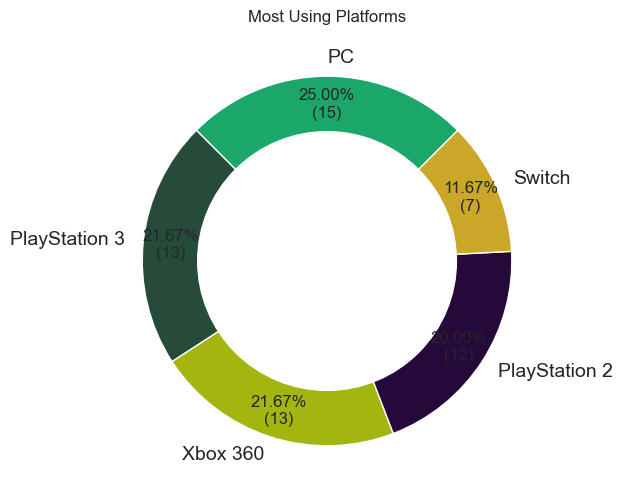

In [215]:
#Hadi görselleştirelim.
label=[]
for i in most_using_platform.index:
    label.append(i)
total=np.sum(most_using_platform.values)

def val_per(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

plt.figure(figsize=(6,6))
colors=['#1CA76A','#274B3B','#A3B50F','#25093B','#CAA629']
plt.pie(x=most_using_platform.values,labels=label,colors=colors,startangle=45,pctdistance=0.85,autopct= val_per)
my_circle=plt.Circle((0,0),0.7,color='white')
p=plt.gcf()#get current figure
p.gca().add_artist(my_circle)
plt.title('Most Using Platforms')
plt.show()

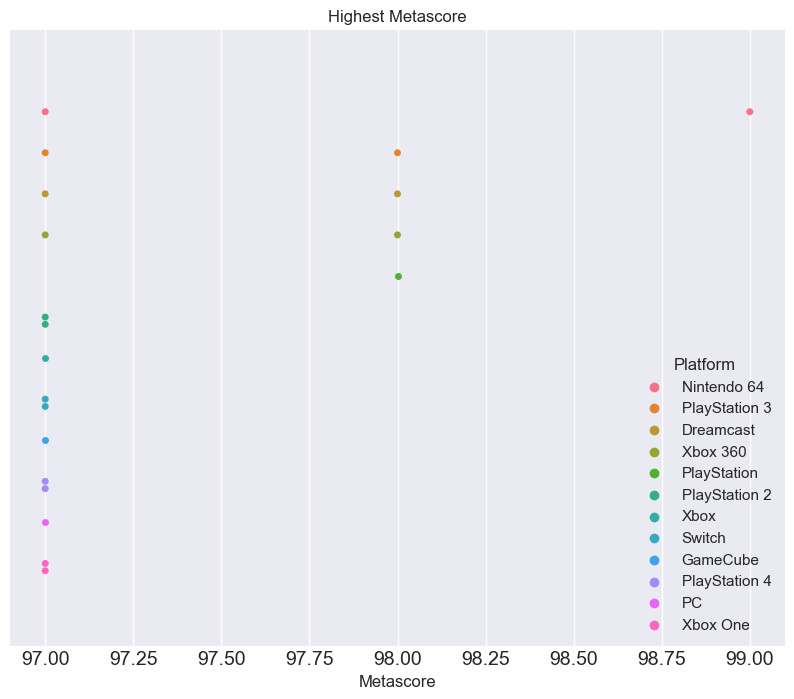

In [216]:
#En yüksek metascore'u olan 20 oynunun oynadığı platformları inceleyelim.

highest_metascore=data.sort_values(by='Metascore',ascending=False)[:20]

plt.figure(figsize=(10,8))
sns.swarmplot(data=highest_metascore,x='Metascore',hue='Platform',orient="h",dodge=True)
plt.title('Highest Metascore')
plt.show()

In [217]:
#İlk öncelikle sadece yılları alacak şekilde bir sutun oluşturalım.

data['Years']=pd.DatetimeIndex(data['Date']).year
data

,Rank,Name,Platform,Metascore,Date,Title,Years
0,1,The Legend of Zelda: Ocarina of Time,Nintendo 64,99,23-Nov-98,"As a young boy, Link is tricked by Ganondorf, ...",1998
1,2,Tony Hawk's Pro Skater 2,PlayStation,98,20-Sep-00,As most major publishers' development efforts ...,2000
2,3,Grand Theft Auto IV,PlayStation 3,98,29-Apr-08,[Metacritic's 2008 PS3 Game of the Year; Also ...,2008
3,4,SoulCalibur,Dreamcast,98,8-Sep-99,"This is a tale of souls and swords, transcendi...",1999
4,5,Grand Theft Auto IV,Xbox 360,98,29-Apr-08,[Metacritic's 2008 Xbox 360 Game of the Year; ...,2008
...,...,...,...,...,...,...,...
95,96,Sid Meier's Civilization II,PC,94,29-Feb-96,An empire-building turn-based strategy game. T...,1996
96,97,Quake,PC,94,22-Jun-96,Rage through 32 single player levels and 6 dea...,1996
97,98,Call of Duty 4: Modern Warfare,Xbox 360,94,5-Nov-07,As Call of Duty 4: Modern Warfare's single pla...,2007
98,99,BioShock Infinite,PC,94,25-Mar-13,Initially conceived as a floating symbol of Am...,2013


In [218]:
df_counts = data['Years'].value_counts().reset_index()
df_counts.columns = ['Years', 'Count']

df_counts

,Years,Count
0,2011,9
1,2001,8
2,2007,8
3,2000,8
4,2022,6
5,2002,5
6,2008,5
7,2003,5
8,2010,5
9,2013,5


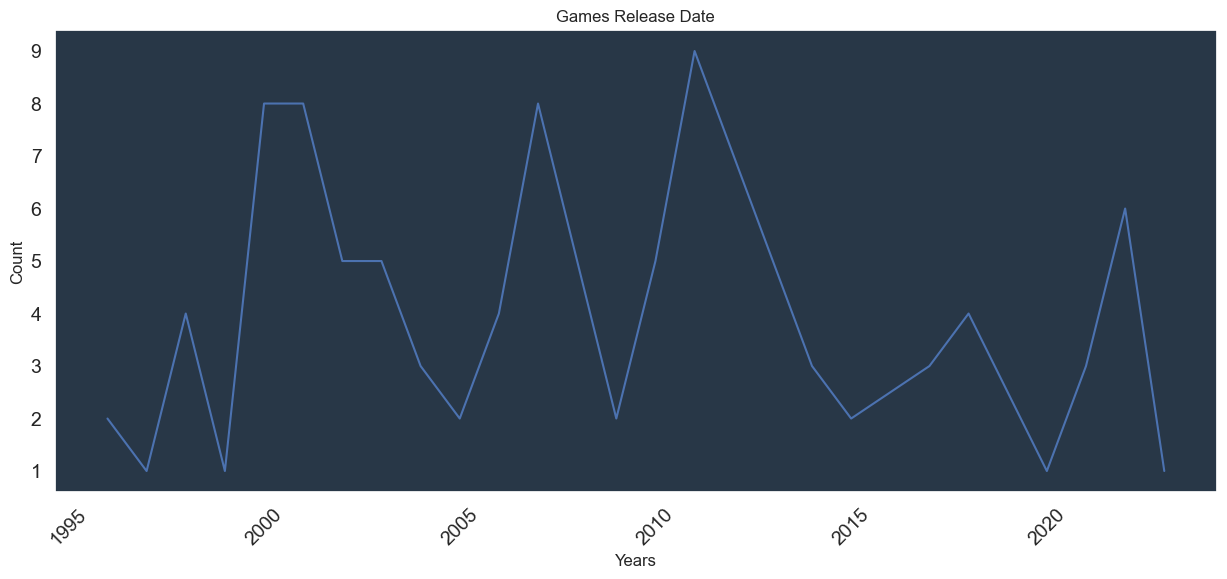

In [219]:
#Oyunların Çıkış tarihleri karşılaştırma
plt.figure(figsize=(15,6))
sns.set(rc={'axes.facecolor':'#283747','axes.grid':False,'xtick.labelsize':14,'ytick.labelsize':14})
sns.lineplot(data=df_counts,x='Years',y='Count',markers=True)
plt.xticks(rotation=45)
plt.title('Games Release Date')
plt.show()

# FOR THE TEXT COLUMN : 

## Sentiment Analysis
Duygu analizinin ana fikri, bir metnin olumlu veya olumsuz bir tona sahip olup olmadığını anlamaktır. Örneğin, "Bu üstü seviyorum" cümlesi. olumlu bir duyguya ve "Renkten nefret ediyorum" cümlesine sahiptir. olumsuz bir duyguya sahiptir.

Polarity, bir ifadenin olumlu mu yoksa olumsuz mu olduğunun bir göstergesidir ve -1 (negatif) ile 1 (pozitif) arasında bir sayıdır. “Kesimi seviyorum” cümlesi 0,5, “Renkten nefret ediyorum” cümlesi -0,8 kutupsallığına sahiptir.

In [220]:
#Title'lara duygu analizi yapalım.
data["polarity"] = data["Title"].map(lambda x: np.mean([sentence.polarity for sentence in TextBlob(x).sentences]))

In [221]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) 

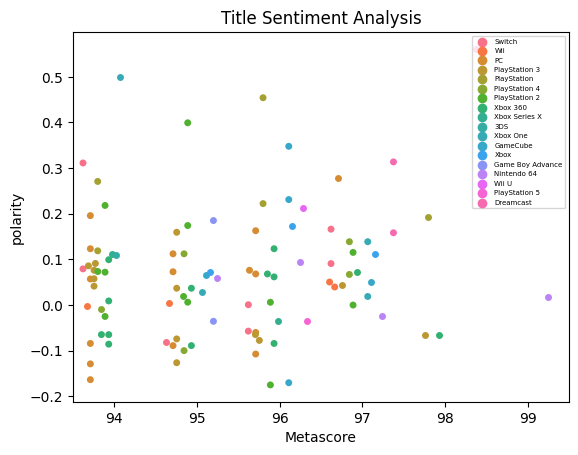

In [229]:
visSwarmPlot(data,'Metascore','polarity','Platform')

In [ ]:
# Done ! 